01. Import Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

In [3]:
path = r'/Users/kevinclancy/Desktop/NFL'

In [4]:
spreads = pd.read_csv(os.path.join(path, '02 Data', 'cleaned data', 'NFL_spreads_update3.csv'))

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

02. Data Cleaning

In [7]:
spreads.columns

Index(['Unnamed: 0', 'game_date', 'season', 'week', 'day_of_week',
       'time_of_game', 'primetime', 'playoff_game', 'team_home', 'score_home',
       'score_away', 'team_away', 'team_favored_id', 'point_spread',
       'total_line', 'stadium', 'game_location', 'stadium_capacity',
       'stadium_latitude', 'stadium_longitude', 'stadium_elevation',
       'stadium_neutral', 'weather_temp', 'wind_mph', 'indoor',
       'point_differential', 'total_points_scored', 'favorite', 'total_result',
       'result', 'cover_result', 'team_favored_id_int', 'spread_category',
       'winner', 'loser', 'cover_id'],
      dtype='object')

In [8]:
spreads.head()

,Unnamed: 0,game_date,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_capacity,stadium_latitude,stadium_longitude,stadium_elevation,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,total_result,result,cover_result,team_favored_id_int,spread_category,winner,loser,cover_id
0,0,9/8/16,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado","76,125",39.743889,-105.020000,5280.0,0,82,2,0,1,41,0,1,1,1,5,Low Spread,DEN,CAR,DEN
1,1,9/11/16,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona","63,400",33.528000,-112.263000,1068.0,0,72,0,1,-2,44,1,2,0,0,1,High Spread,NE,ARI,NE
2,2,9/11/16,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",71000,33.755556,-84.400000,1050.0,0,72,0,1,-7,55,1,1,0,0,2,Low Spread,TB,ATL,TB
3,3,9/11/16,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland","71,008",39.278056,-76.622778,50.0,0,82,7,0,6,20,1,0,1,1,3,Low Spread,BAL,BUF,BAL
4,4,9/11/16,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas","80,000",32.747778,-97.092778,607.0,0,72,0,1,-1,39,0,0,0,2,24,Low Spread,NYG,DAL,Push


In [9]:
spreads_df = spreads[['game_date', 'total_points_scored', 'total_line']]

In [10]:
spreads_df.shape

(2191, 3)

In [11]:
spreads_df.dtypes

game_date               object
total_points_scored      int64
total_line             float64
dtype: object

In [12]:
# change format of game_date to datetime
from datetime import datetime
spreads_df['game_date'] = pd.to_datetime(spreads_df['game_date'])

In [13]:
# set game_date as index
spreads_df.set_index('game_date', inplace=True)

In [14]:
spreads_df.shape

(2191, 2)

In [15]:
spreads_df.head()

,total_points_scored,total_line
game_date,,
2016-09-08,41,40.5
2016-09-11,44,44.0
2016-09-11,55,47.0
2016-09-11,20,44.5
2016-09-11,39,47.5


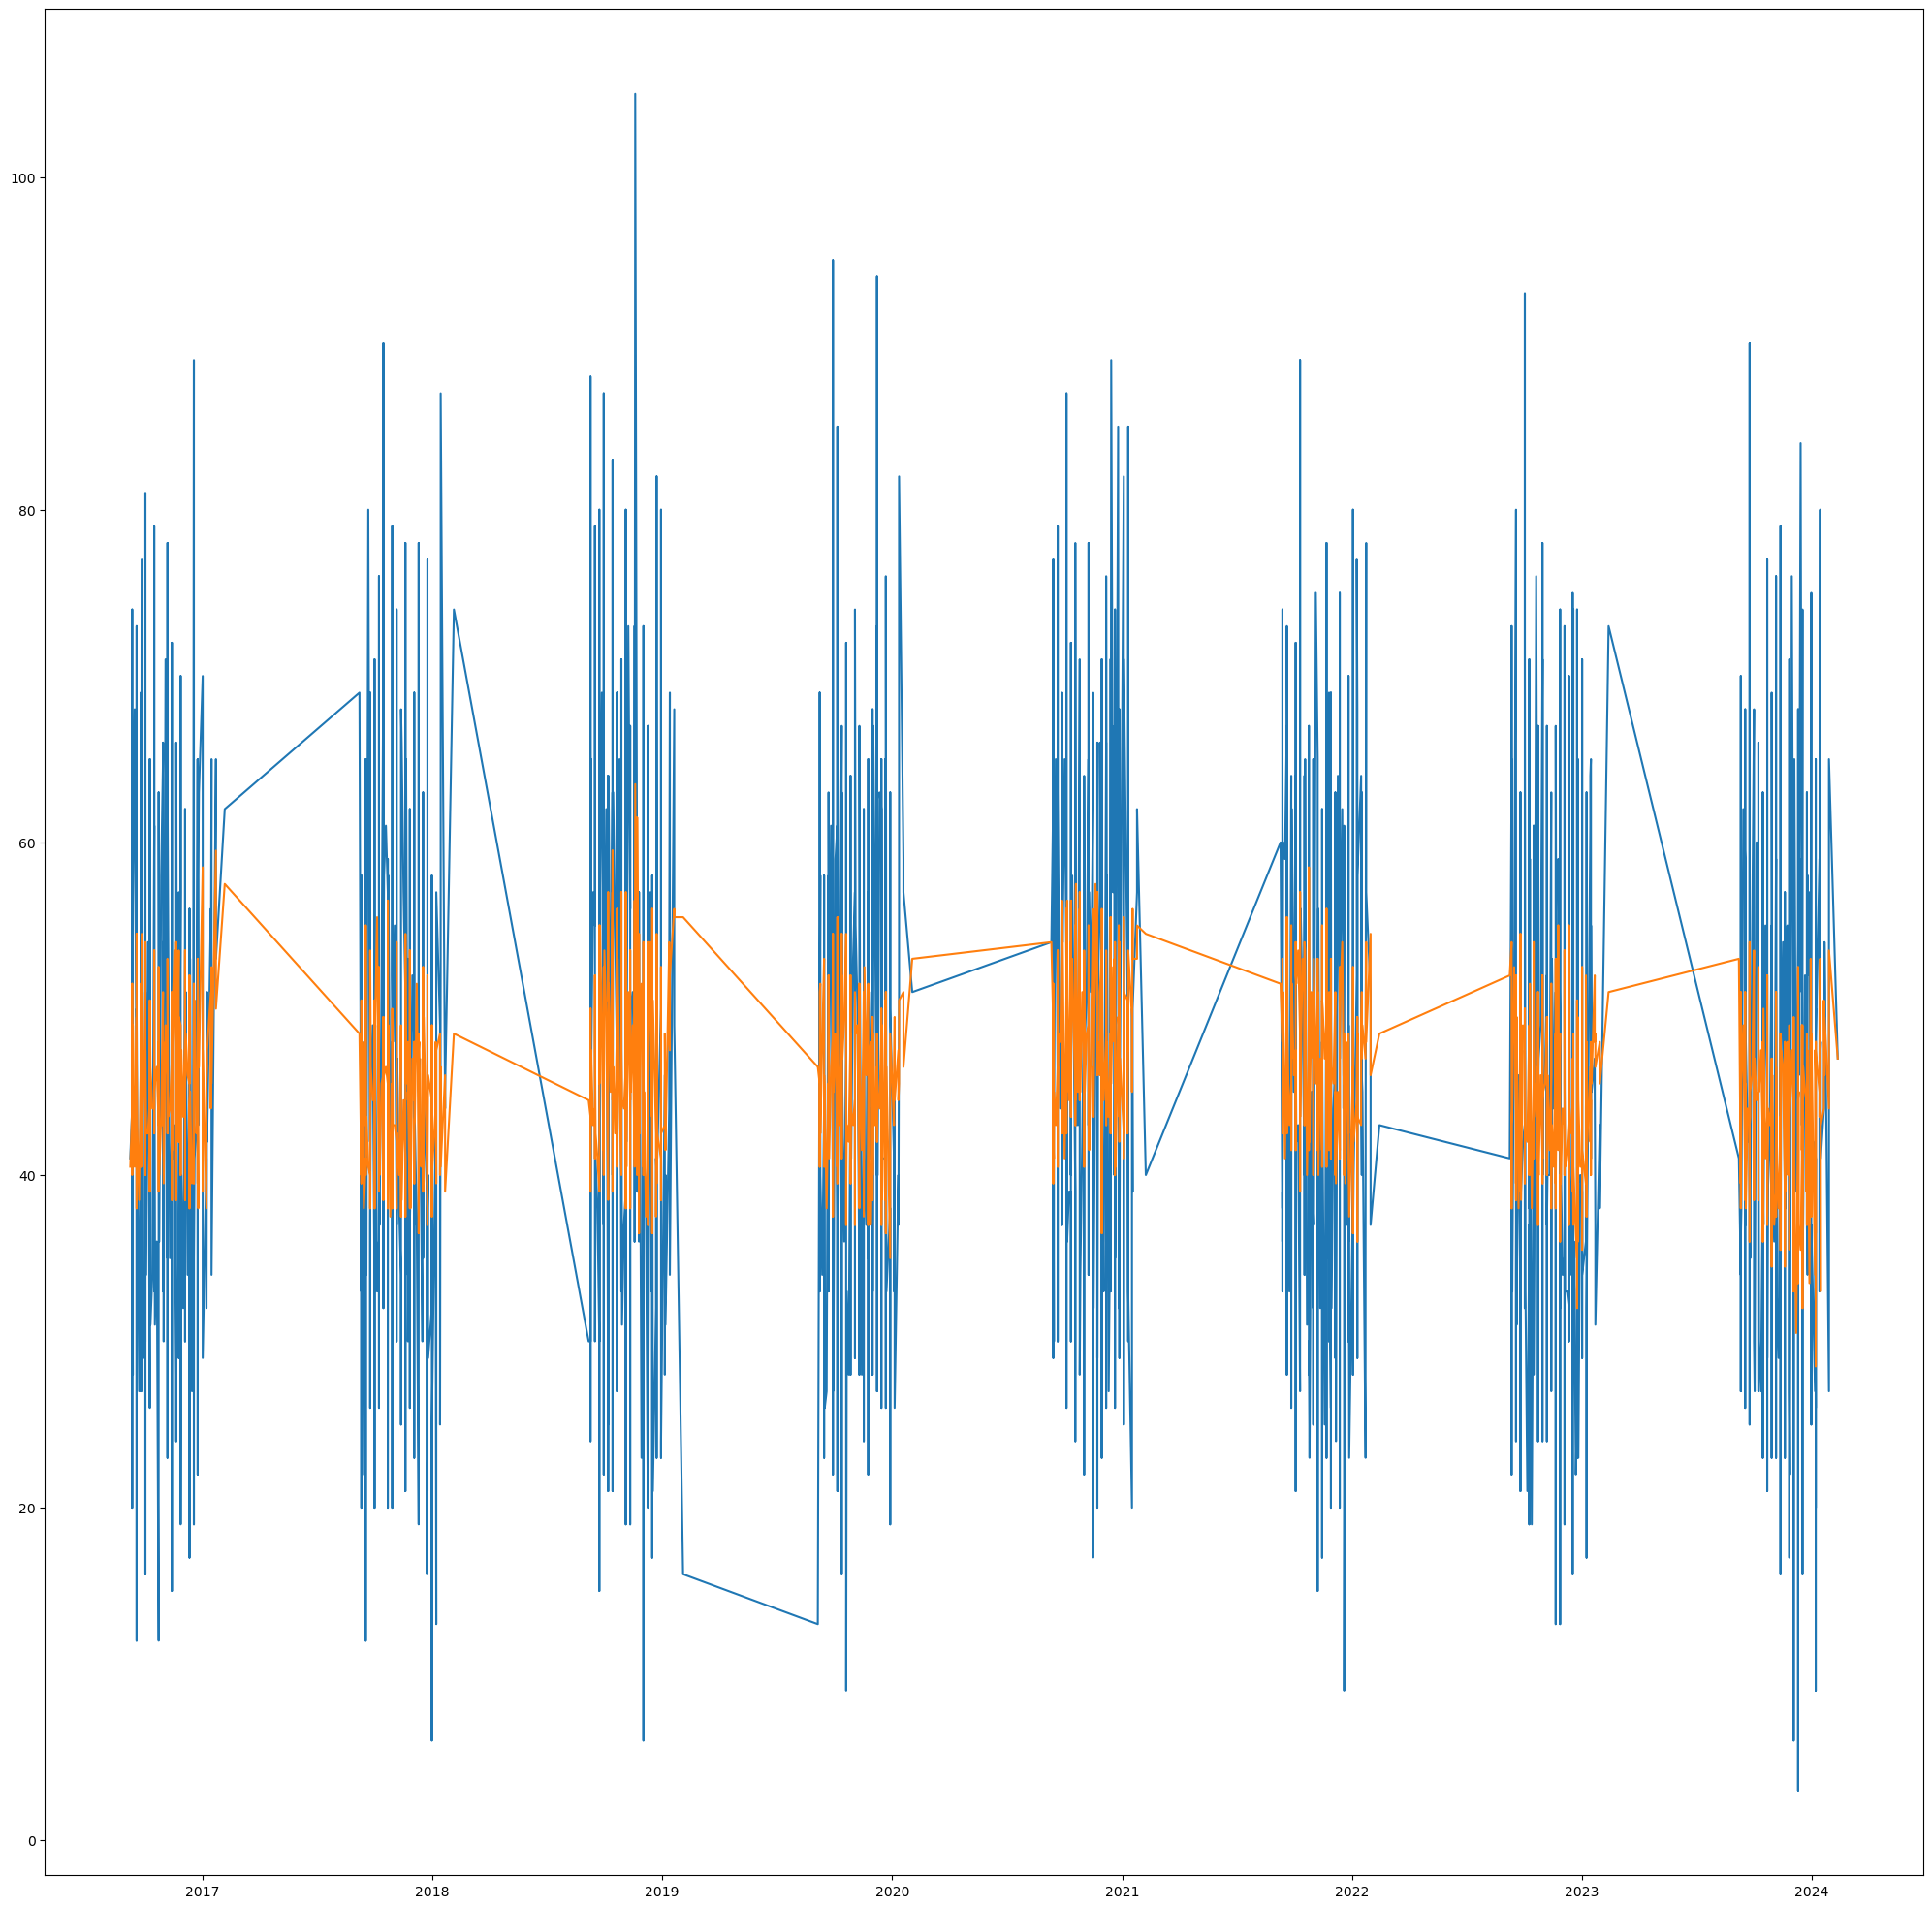

In [16]:
# plot spreads_df using matplotlib
plt.figure(figsize=(25,25), dpi=100)
plt.plot(spreads_df)

I chose the data points total_line and total_points_scored because I thought it would be interesting to see how they moved with one another across the course of a season. In the above visualization, the orange represents the total_line set by oddsmakers and the blue represents the total_points_scored in the corresponding game. As we can see, the total lines typically begin a season in the range 40-60 but as the season progresses we can see oddsmakers start to set lines on either side of those numbers. I assume this is as the season goes on, oddsmakers are able to gather more data on team's performance therefore adjusting their odds based on the data. Towards the end of the plots, we can see the total_lines tightening, I believe this represents playoff games where teams might be more evenly matched and therefore may score less total points.

03. Time-Series Analysis: Decomposition

In [19]:
df = spreads[['game_date', 'total_points_scored']]

In [20]:
df.head()

,game_date,total_points_scored
0,9/8/16,41
1,9/11/16,44
2,9/11/16,55
3,9/11/16,20
4,9/11/16,39


In [21]:
from datetime import datetime

df['gamedate'] = pd.to_datetime(df['game_date'])
df = df.set_index('gamedate')
df.drop(['game_date'], axis=1, inplace=True)
df.head()

,total_points_scored
gamedate,
2016-09-08,41
2016-09-11,44
2016-09-11,55
2016-09-11,20
2016-09-11,39


In [22]:
# set period to 30 for monthly decomposition
decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative', period=30)

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

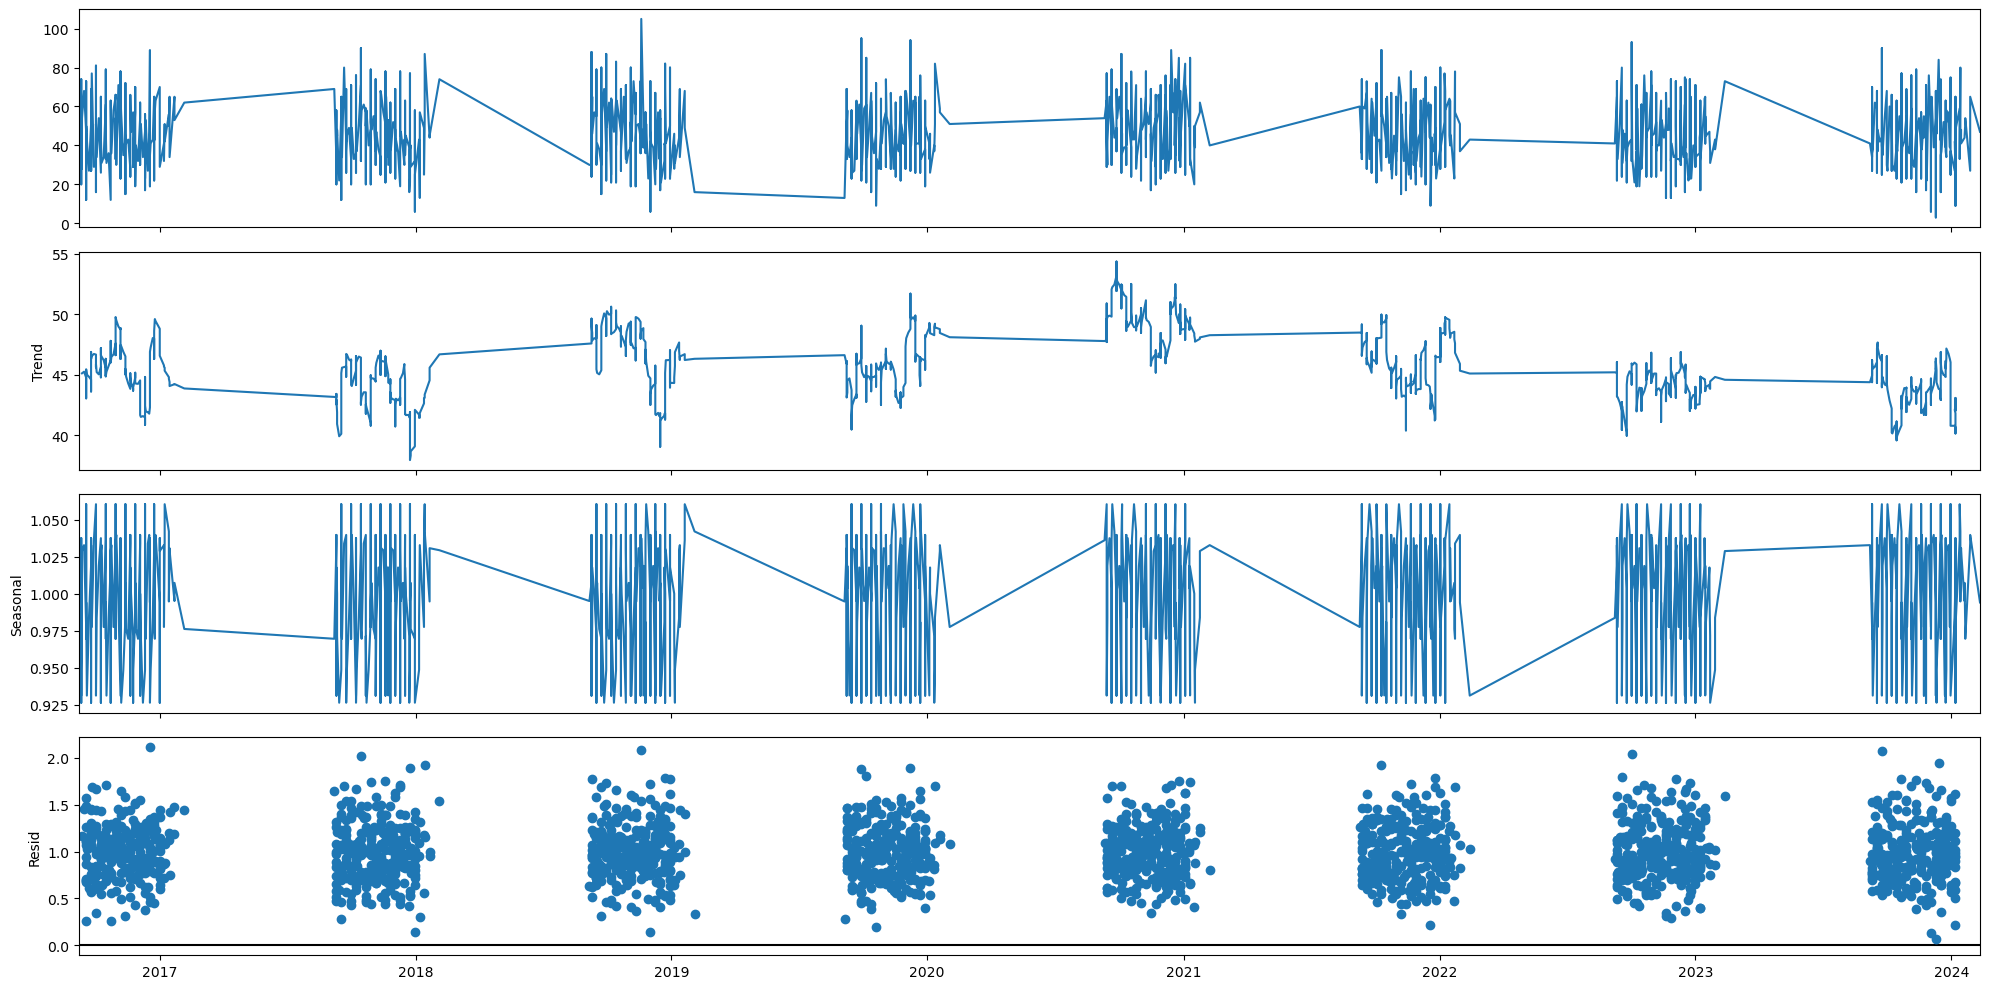

In [24]:
decomposition.plot()
plt.show()

One interesting trend to note is the amount of points scored in the 2021 season, it is significantly higher than other seasons.

04. Test For Stationarity

In [27]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)

In [28]:
dickey_fuller(df)

Dickey-Fuller Stationarity test:
Test Statistic                  -46.260693
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    2190.000000
Critical Value (1%)              -3.433339
Critical Value (5%)              -2.862861
Critical Value (10%)             -2.567473
dtype: float64


A p-value of 0.000000 indicates that the results are very significant. The test statistic is much smaller than the critical values therefore I have successfully disproved the presence of a unit root which indicates that the data is stationary.

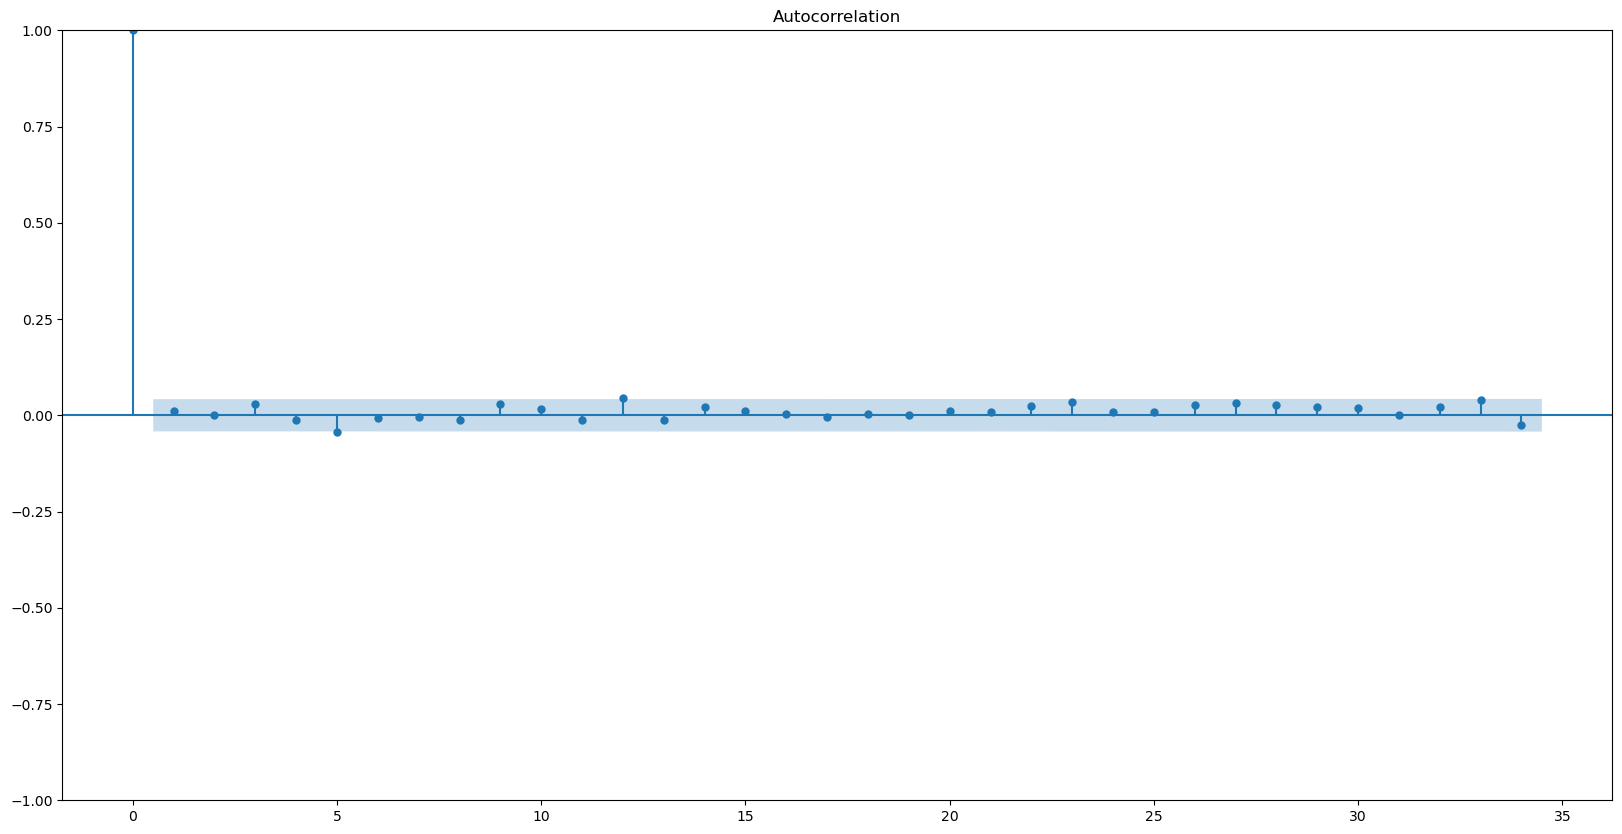

In [30]:
# plot autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plt.show()

In [31]:
# differencing
df_diff = df - df.shift(1)

In [32]:
df_diff.dropna(inplace=True)

In [33]:
df_diff.head()

,total_points_scored
gamedate,
2016-09-11,3.0
2016-09-11,11.0
2016-09-11,-35.0
2016-09-11,19.0
2016-09-11,-2.0


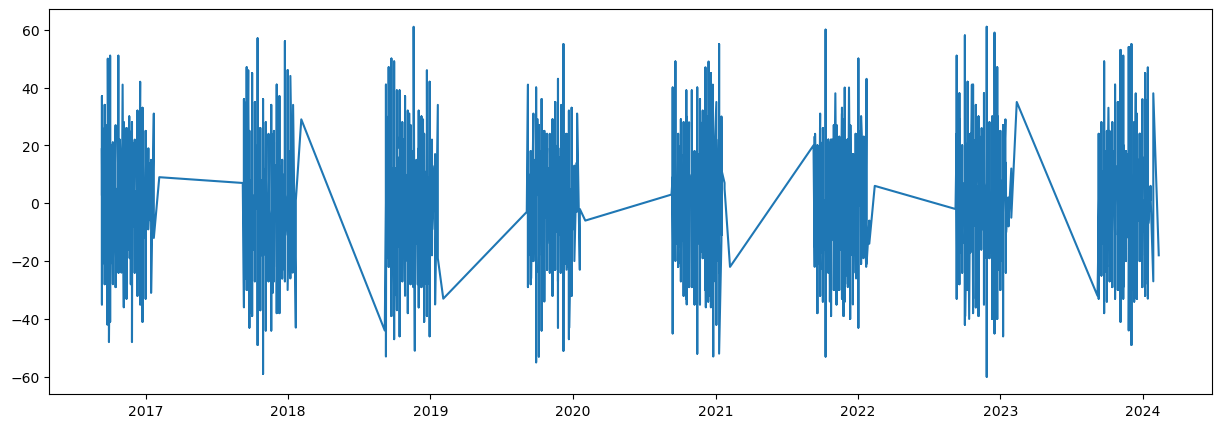

In [34]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [35]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.660635e+01
p-value                        1.746486e-29
Number of Lags Used            2.600000e+01
Number of Observations Used    2.163000e+03
Critical Value (1%)           -3.433377e+00
Critical Value (5%)           -2.862877e+00
Critical Value (10%)          -2.567482e+00
dtype: float64


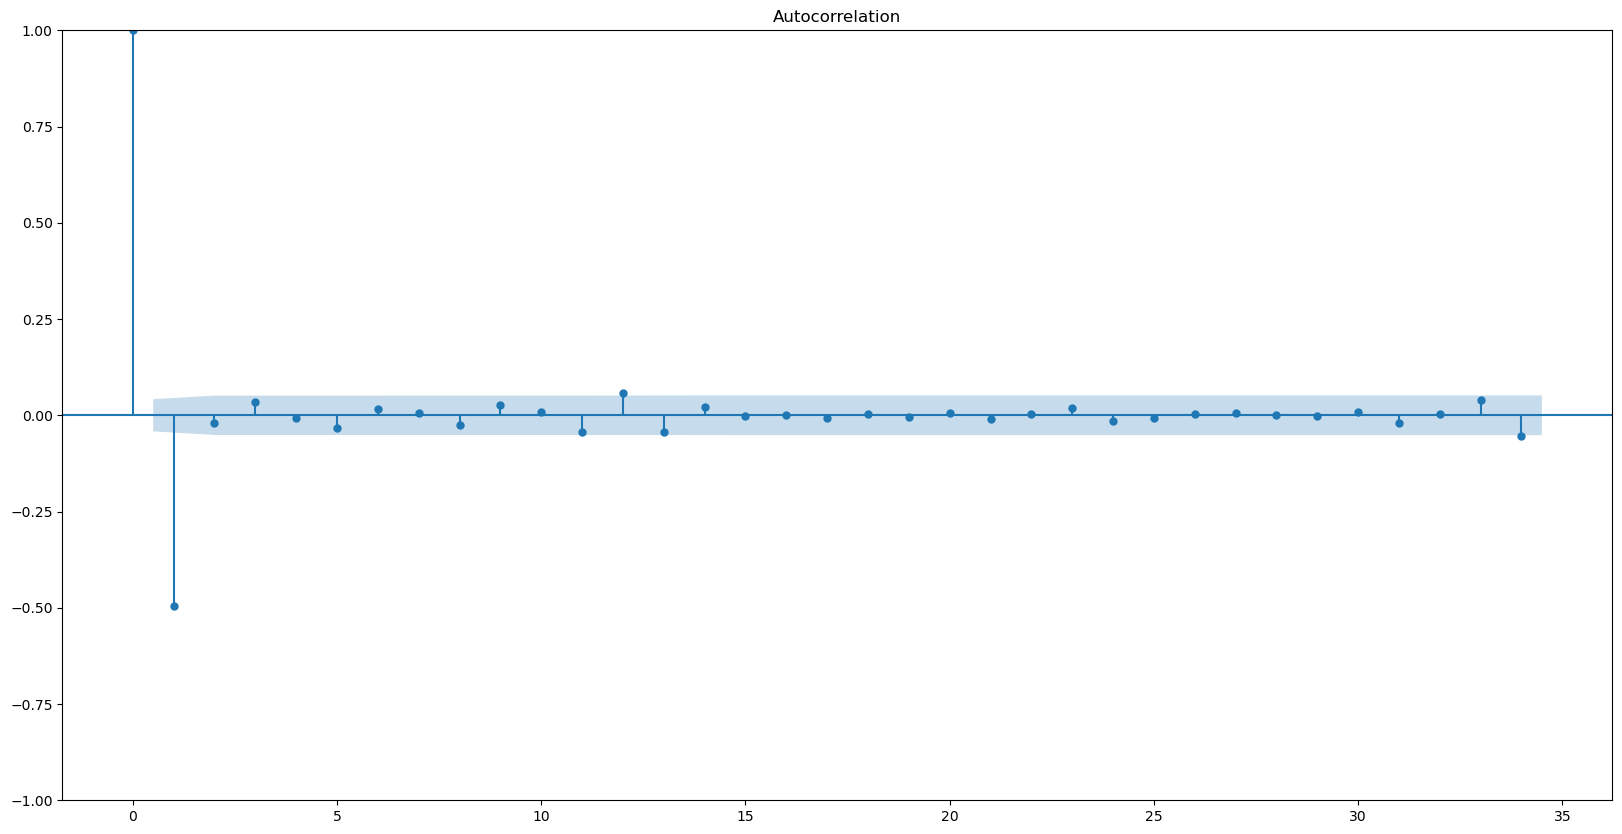

In [36]:
plot_acf(df_diff)
plt.show()

In [37]:
spreads.to_csv(os.path.join(path, '02 Data', 'cleaned data', 'NFL_spreads_update3.csv'))

05. Bonus 

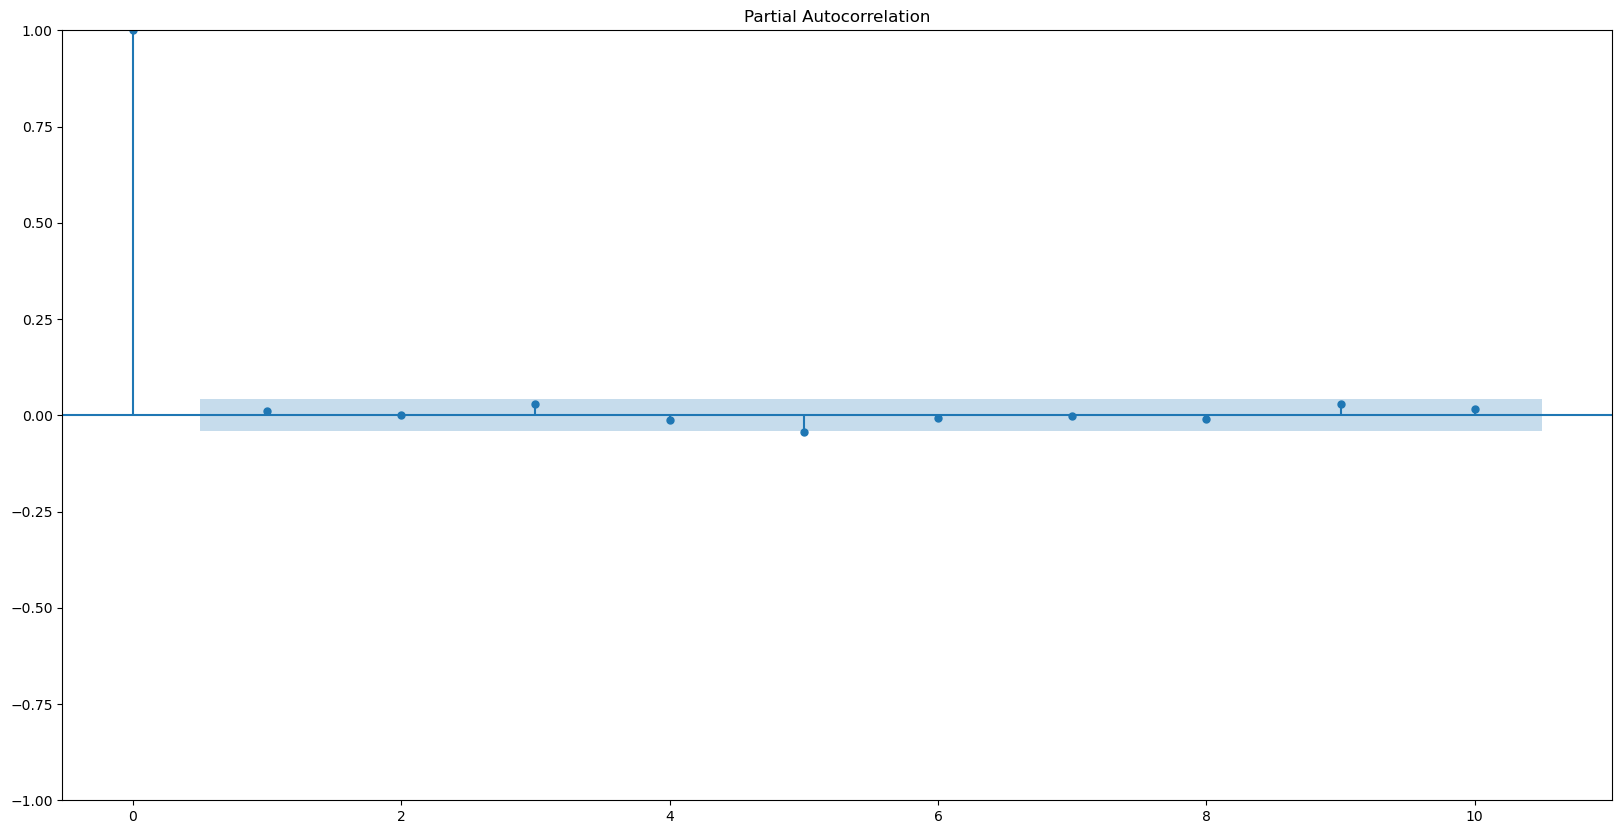

<Figure size 4500x4500 with 0 Axes>

In [39]:
# plot partial 
plot_pacf(df, lags=10)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

In [40]:
p = 3

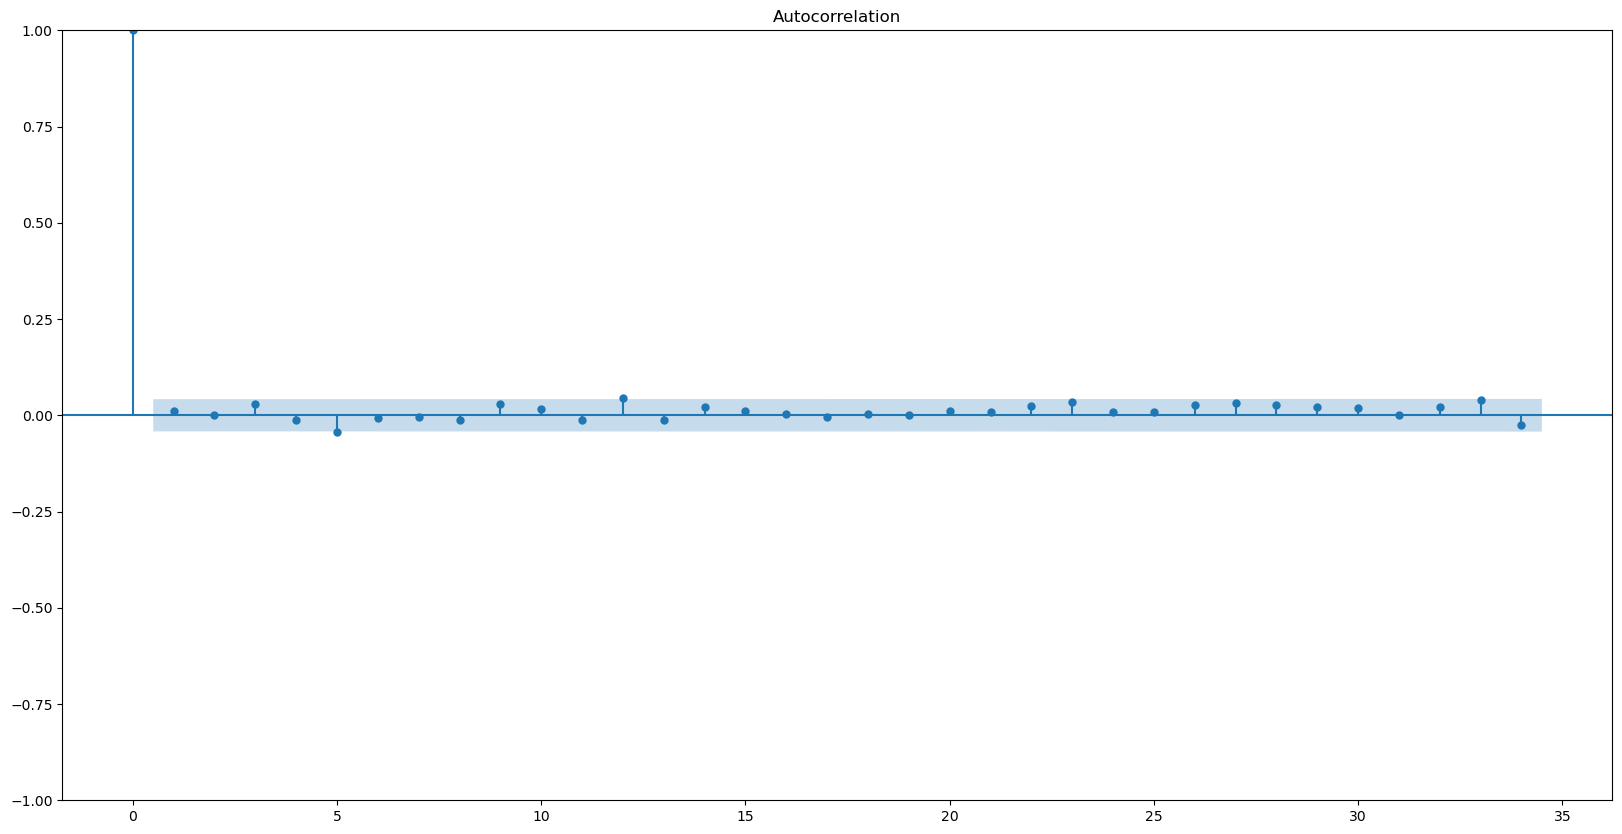

<Figure size 1500x500 with 0 Axes>

In [41]:
plot_acf(df)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

In [42]:
q = 4

In [43]:
# split the data
train = df['total_points_scored'][:1752]
test = df['total_points_scored'][1751:]

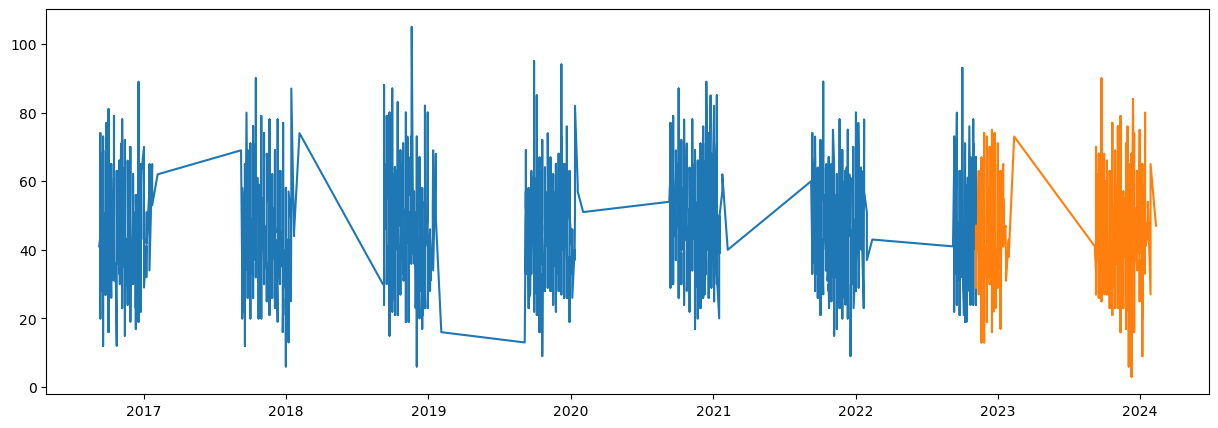

In [44]:
# plot the data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [45]:
train.shape

(1752,)

In [46]:
test.shape

(440,)

In [47]:
from statsmodels.tsa.api import ARIMA

                                SARIMAX Results                                
Dep. Variable:     total_points_scored   No. Observations:                 1752
Model:                  ARIMA(3, 0, 4)   Log Likelihood               -7117.864
Date:                 Thu, 11 Jul 2024   AIC                          14253.729
Time:                         15:19:22   BIC                          14302.945
Sample:                              0   HQIC                         14271.921
                                - 1752                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.0365      0.341    135.081      0.000      45.369      46.705
ar.L1          0.8006      0.631      1.268      0.205      -0.437       2.038
ar.L2         -0.5744      0.660     -0.871 

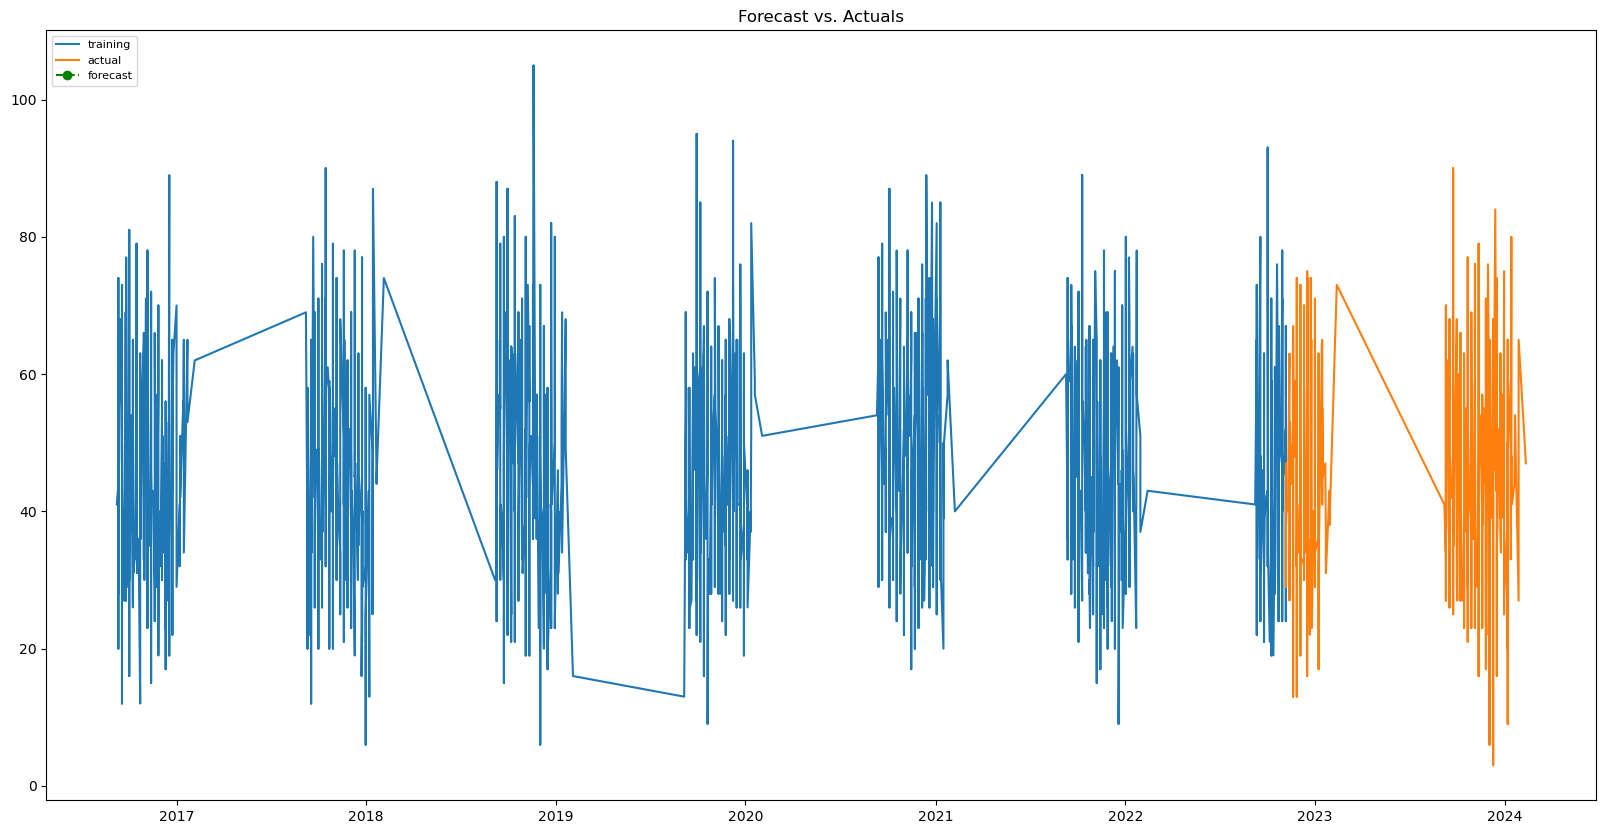

In [48]:
model = ARIMA(train, order=(3, 0, 4))
fitted = model.fit()
print(fitted.summary())

# forecast
fc_result = fitted.get_forecast(steps=len(test))
fc = fc_result.predicted_mean
se = fc_result.se_mean
conf = fc_result.conf_int(alpha=0.05)

# make panda series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf.iloc[:, 1], index=test.index) # upper bound of the confidence interval

# plot
plt.figure(figsize=(20,10), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast', color='green', linestyle='dashed', marker='o')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=0.05)
plt.title('Forecast vs. Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

I don't understand why it's not forecasting?